In [1]:
# Bibliothek importieren

import pandas as pd

In [2]:
# Datensatz importieren

df = pd.read_csv('crowdfunding_preprocess2.csv', index_col=0)
df

,funded_amount,funded_cluster,funding_goal,goal_cluster,successful_funding,success_factor,activity,sector,use_description,country,partner_id,lender_count,count_male,count_female,count_initiators,gender_initiators,repayment_interval
0,300,"(200, 500]",300,"(200, 500]",goal_achieved,1.0,Fruits & Vegetables,Food,1,Pakistan,247.0,12,0,1,1,female,irregular
1,575,"(500, 1000]",575,"(500, 1000]",goal_achieved,1.0,Rickshaw,Transportation,1,Pakistan,247.0,14,0,2,2,female,irregular
2,150,"(100, 200]",150,"(100, 200]",goal_achieved,1.0,Transportation,Transportation,1,India,334.0,6,0,1,1,female,bullet
3,200,"(100, 200]",200,"(100, 200]",goal_achieved,1.0,Embroidery,Arts,1,Pakistan,247.0,8,0,1,1,female,irregular
4,400,"(200, 500]",400,"(200, 500]",goal_achieved,1.0,Milk Sales,Food,1,Pakistan,245.0,16,0,1,1,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671199,0,"(-1, 0]",25,"(0, 100]",no_funding,0.0,Livestock,Agriculture,1,Paraguay,58.0,0,0,1,1,female,monthly
671200,0,"(-1, 0]",25,"(0, 100]",no_funding,0.0,Livestock,Agriculture,1,Paraguay,58.0,0,0,1,1,female,monthly
671201,25,"(0, 100]",25,"(0, 100]",goal_achieved,1.0,Livestock,Agriculture,1,Kenya,138.0,1,0,1,1,female,monthly
671203,0,"(-1, 0]",25,"(0, 100]",no_funding,0.0,Livestock,Agriculture,1,Kenya,138.0,0,0,1,1,female,monthly


# Ausreißer

In [3]:
import seaborn as sns

In [4]:
import scipy.stats

.normaltest testet auf die Nullhypothese, dass die Daten normalverteilt sind. Da alle unten stehenden Daten signifikant werden (pvalue=0.0) wird die Nullhypothese verworfen --> alle intervallskalierten Spalten unseres df sind NICHT normalverteilt! 

Damit erübrigt sich eine Überprüfung von Outliers anhand des z-scores > 3 sowie anhand von Boxplots (auch bei Boxplots macht eine Ausreißer-Bestimmung anhand der Whiskers (Q1 - 1.5*IQR, Q3 + 1.5*IQR) auch hinfällig: nur bei normalverteilten Daten ist diese Ermittlung von Ausreißern sinnvoll. 

Zudem ist davon auszugehen, dass bei dieser Größe des Datensatzes einzelne Ausreißer in Auswertungen zu vernachlässigen sind.

In [5]:
scipy.stats.normaltest(a = df.funded_amount, axis=0, nan_policy='omit')

NormaltestResult(statistic=1074874.3873034115, pvalue=0.0)

In [6]:
scipy.stats.normaltest(a = df.funding_goal, axis=0, nan_policy='omit')

NormaltestResult(statistic=1044442.1963383795, pvalue=0.0)

In [7]:
scipy.stats.normaltest(a = df.lender_count, axis=0, nan_policy='omit')

NormaltestResult(statistic=1258281.252543462, pvalue=0.0)

## Beispielhaft die Berechnung der Whiskers im Boxplot
Boxplot nicht aussagekräftig, da Daten nicht normalverteilt. Dies ist nur ein Exempel, wie man die Ausreißer anhand des Boxplots berechenen hätte können, wenn man die Whiskers nicht ablesen kann.

In [8]:
df.describe()

,funded_amount,funding_goal,success_factor,use_description,lender_count,count_male,count_female,count_initiators
count,666984.000000,666984.000000,666984.000000,666984.000000,666984.000000,666984.000000,666984.000000,666984.000000
mean,785.127844,840.300742,0.961130,0.999984,20.550875,0.412160,1.606197,2.018357
std,1127.999928,1187.909500,0.157316,0.004061,28.366197,1.119501,3.041054,3.413631
min,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,250.000000,275.000000,1.000000,1.000000,7.000000,0.000000,1.000000,1.000000
50%,450.000000,500.000000,1.000000,1.000000,13.000000,0.000000,1.000000,1.000000
75%,900.000000,1000.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000
max,100000.000000,100000.000000,1.133333,1.000000,2986.000000,44.000000,50.000000,50.000000


<AxesSubplot:xlabel='lender_count'>

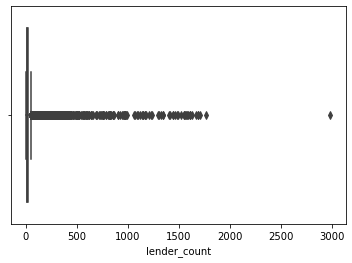

In [9]:
sns.boxplot(x='lender_count', data= df)

###### Da an Grafik der Wert zu Whiskers nicht ablesbar, werden diese errechnet:

Q1 = 7

Q3 = 24

IQR = 17

top whisker: Q3 + 1.5*IQR = 24 + 1.5*17 = 49.5

bottom whisker: Q1 - 1.5*IQR = 7 - 1.5*17 = -18.5 --> 0!

In [10]:
df.loc[df.lender_count>49.5, :]

,funded_amount,funded_cluster,funding_goal,goal_cluster,successful_funding,success_factor,activity,sector,use_description,country,partner_id,lender_count,count_male,count_female,count_initiators,gender_initiators,repayment_interval
35,2225,"(2000, 5000]",2225,"(2000, 5000]",goal_achieved,1.000000,Personal Products Sales,Retail,1,Pakistan,247.0,58,0,8,8,female,irregular
50,3175,"(2000, 5000]",3175,"(2000, 5000]",goal_achieved,1.000000,Butcher Shop,Food,1,Tanzania,87.0,93,5,0,5,male,monthly
59,3175,"(2000, 5000]",3175,"(2000, 5000]",goal_achieved,1.000000,Home Products Sales,Retail,1,Tanzania,87.0,114,1,3,4,mixed,irregular
62,4275,"(2000, 5000]",4275,"(2000, 5000]",goal_achieved,1.000000,Personal Housing Expenses,Housing,1,Vietnam,331.0,144,0,9,9,female,bullet
70,2000,"(1000, 2000]",2000,"(1000, 2000]",goal_achieved,1.000000,Retail,Retail,1,Iraq,166.0,71,1,0,1,male,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670283,6975,"(5000, 10000]",6975,"(5000, 10000]",goal_achieved,1.000000,Dairy,Agriculture,1,Bolivia,59.0,123,0,8,8,female,monthly
670503,2700,"(2000, 5000]",2700,"(2000, 5000]",goal_achieved,1.000000,Farming,Agriculture,1,Ukraine,26.0,94,0,1,1,female,monthly
670540,2275,"(2000, 5000]",6000,"(5000, 10000]",goal_not_achieved,0.379167,Agriculture,Agriculture,1,United States,no partner,54,0,1,1,female,bullet
670674,1650,"(1000, 2000]",5600,"(5000, 10000]",goal_not_achieved,0.294643,Farming,Agriculture,1,Sierra Leone,504.0,58,0,19,19,female,irregular


Beispielhafte Darstellung der Ermittlung der Whiskers per Rechnung. Da Daten nicht normalverteilt sind, wird von einer Bestimmung auf diese Weise abgesehen.

# Ein Ausreißer mit Pairplot gefunden

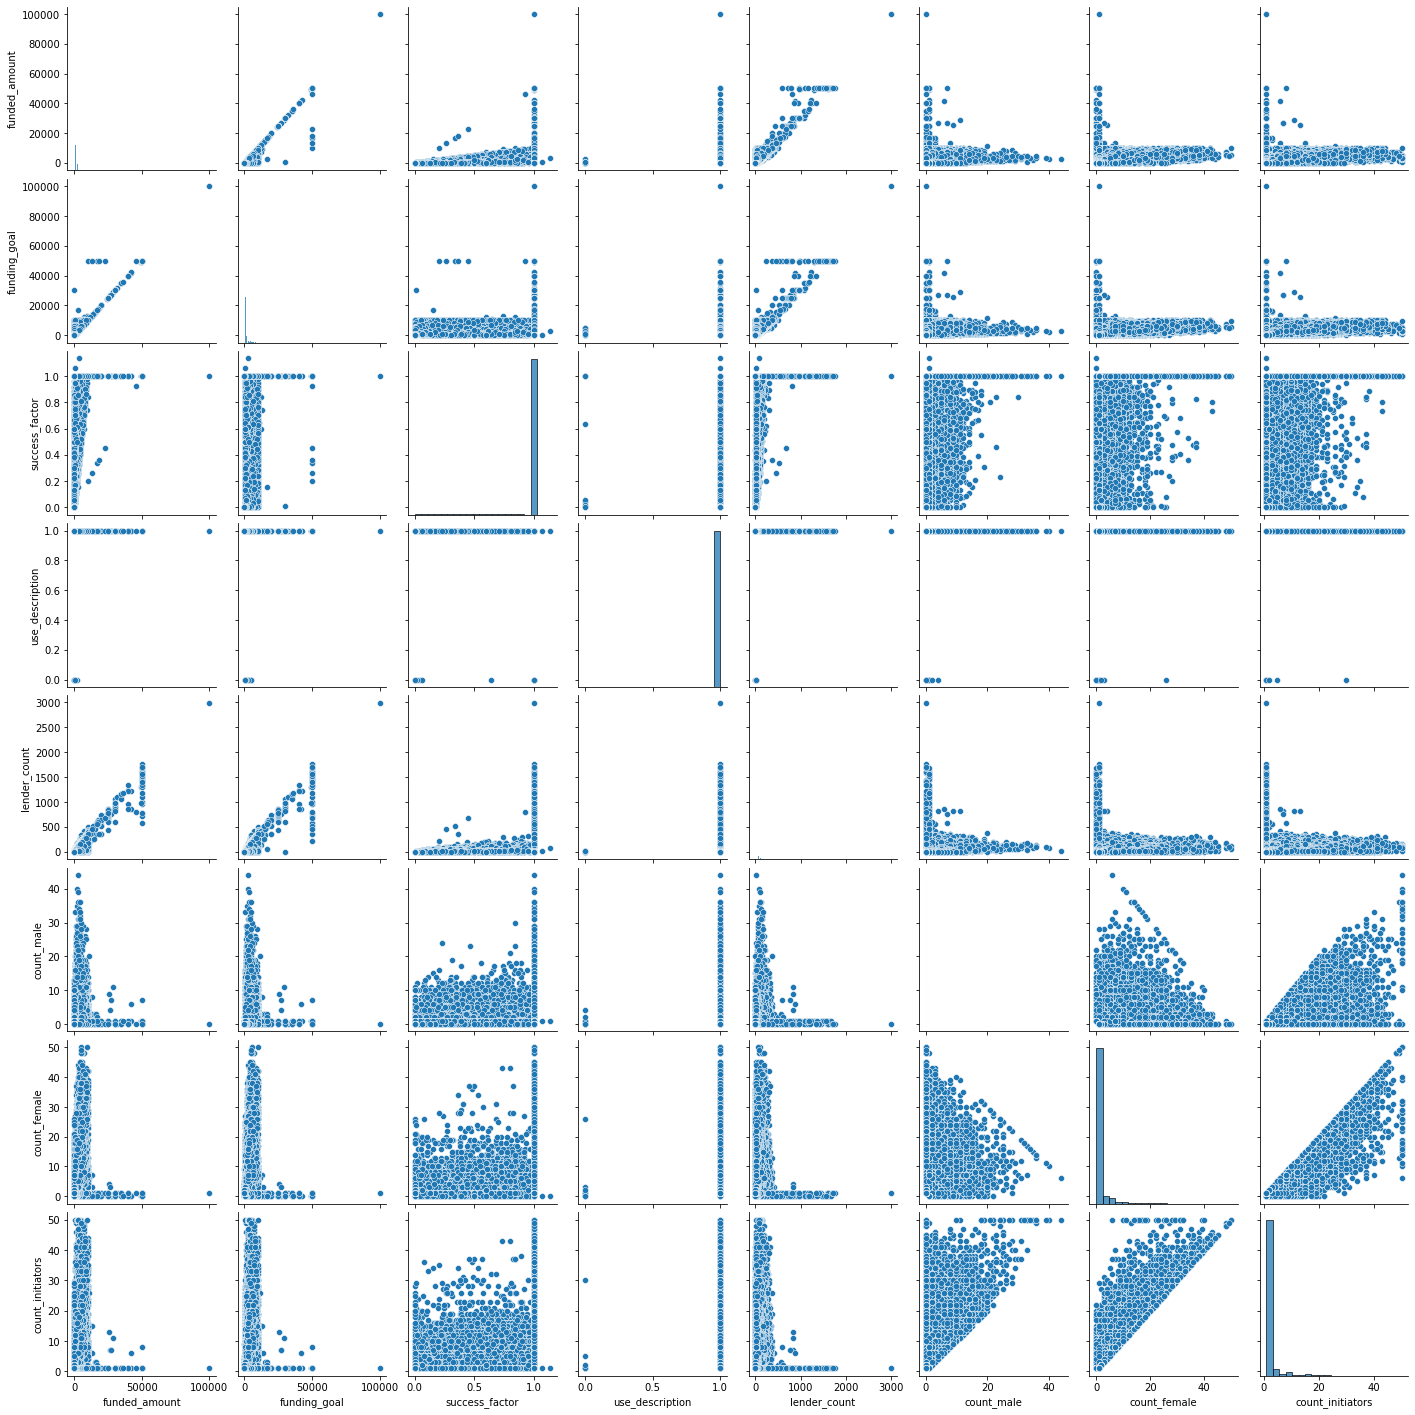

In [11]:
sns.pairplot(df, vars=['funded_amount', 'funding_goal', 'success_factor', 'use_description', 
                       'lender_count', 'count_male', 'count_female', 'count_initiators'])

In [12]:
df.loc[df.funded_amount > 70000, :]

,funded_amount,funded_cluster,funding_goal,goal_cluster,successful_funding,success_factor,activity,sector,use_description,country,partner_id,lender_count,count_male,count_female,count_initiators,gender_initiators,repayment_interval
70499,100000,"(50000, 100000]",100000,"(50000, 100000]",goal_achieved,1.0,Agriculture,Agriculture,1,Haiti,315.0,2986,0,1,1,female,irregular


In [13]:
df.funded_amount.mean()

785.1278441461864

In [14]:
df.funded_amount.std()

1127.999927710674

## Erkenntnis und Löschung des Ausreißers: 
Es ist eine sehr interessante Information, dass es eine sehr hoch dotiertes Projekt gibt: ein Projekt wurde mit fast doppelt soviel finanziert wie die sonst am höchst dotiertesten Projekte, nämlich mit 100.000 USD. Der Mittelwert der sonstigen Projekte liegt bei 785 USD mit einer Streuung von 1130 USD. 

Da der Ausreißer bei der Visualisierung Probleme bereiten wird (zu große Skalen), wird er aus dem Datensatz entfernt:

In [15]:
df.loc[df.funded_amount > 70000]

,funded_amount,funded_cluster,funding_goal,goal_cluster,successful_funding,success_factor,activity,sector,use_description,country,partner_id,lender_count,count_male,count_female,count_initiators,gender_initiators,repayment_interval
70499,100000,"(50000, 100000]",100000,"(50000, 100000]",goal_achieved,1.0,Agriculture,Agriculture,1,Haiti,315.0,2986,0,1,1,female,irregular


In [16]:
df.loc[df.funded_amount > 70000].index

Int64Index([70499], dtype='int64')

In [17]:
df.drop(index=df.loc[df.funded_amount > 70000].index, inplace=True)
df.head()

,funded_amount,funded_cluster,funding_goal,goal_cluster,successful_funding,success_factor,activity,sector,use_description,country,partner_id,lender_count,count_male,count_female,count_initiators,gender_initiators,repayment_interval
0,300,"(200, 500]",300,"(200, 500]",goal_achieved,1.0,Fruits & Vegetables,Food,1,Pakistan,247.0,12,0,1,1,female,irregular
1,575,"(500, 1000]",575,"(500, 1000]",goal_achieved,1.0,Rickshaw,Transportation,1,Pakistan,247.0,14,0,2,2,female,irregular
2,150,"(100, 200]",150,"(100, 200]",goal_achieved,1.0,Transportation,Transportation,1,India,334.0,6,0,1,1,female,bullet
3,200,"(100, 200]",200,"(100, 200]",goal_achieved,1.0,Embroidery,Arts,1,Pakistan,247.0,8,0,1,1,female,irregular
4,400,"(200, 500]",400,"(200, 500]",goal_achieved,1.0,Milk Sales,Food,1,Pakistan,245.0,16,0,1,1,female,monthly


In [18]:
df.loc[df.funded_amount > 70000]

,funded_amount,funded_cluster,funding_goal,goal_cluster,successful_funding,success_factor,activity,sector,use_description,country,partner_id,lender_count,count_male,count_female,count_initiators,gender_initiators,repayment_interval


In [19]:
df.to_csv('crowdfunding_clean.csv')